In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn import model_selection
%matplotlib inline

[-1.05440799  0.83880629  0.73362772  0.72310986  0.61793129 -2.26396157
 -2.32706871  0.73362772  0.52327058  0.58637772]
[-0.79758944  0.67106774  0.51122624  0.49412185  0.55696573 -1.59244589
 -1.87485421  0.59685812 -1.11737805  0.43041395]
294 57.03913224384368 0.02157304547800442
(294,)
[-0.98078299 -1.02285442  0.87035986  0.80725272  0.77569915  0.67052058
 -1.90635442 -1.39097942 -2.06412228  0.62844915]
[-0.7772522  -0.77118816  0.83639115  0.66727019  0.59383315  0.75019685
 -0.83204325 -0.91867514 -1.1151124   0.52537782]
294 45.27832305376489 0.017124933076310474
(294,)
[-1.09647942 -1.28580085  0.37602058  0.35498486  0.48119915  0.43912772
  0.32343129  0.24980629  0.22877058 -2.35862228]
[-0.84408223 -1.50208458  0.46337854  0.44729167  0.09476752  0.28963744
  0.40298378  0.07112261  0.06529309 -1.92045147]
294 49.814436862253245 0.018840558571200167
(294,)
[-1.11751514  0.63896701  0.57585986  0.51275272  0.26032415 -2.15878299
  0.71259201  0.64948486  0.58637772  0

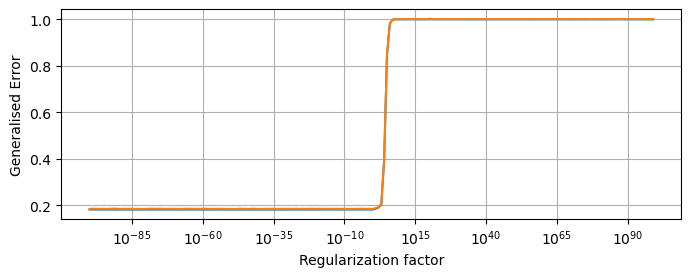

In [22]:

data = pd.read_csv("StandardizedDataFrameWithNansFilled.csv", index_col=0)
data["Status"] = [1 if stat == "Developed" else 0 for stat in data["Status"]]
data.head()

y = data['Life expectancy '].values
y=y.T
X_drop = data.drop(columns = ['Country','Year','Life expectancy '])

# Add offset attribute
attributeNames = X_drop.columns
X_drop = np.concatenate((np.ones((X_drop.shape[0],1)),X_drop),1)
attributeNames = [u'Offset']+attributeNames
N, M = X_drop.shape
X = X_drop

# Values of lambda
lambdas = np.power(10.,range(-100,100))

# Initialize variables


Test =[]
Train =[]
for lamb in lambdas:
    ## Crossvalidation
    # Create crossvalidation partition for evaluation
    K = 10
    CV = model_selection.KFold(K, shuffle=True)

    Error_train_rlr = np.zeros((K,1))
    Error_test_rlr = np.zeros((K,1))

    w_rlr = np.empty((M,K))

    k=0
    for train_index, test_index in CV.split(X,y):
        
        # extract training and test set for current CV fold
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]

        Xty = X_train.T @ y_train
        XtX = X_train.T @ X_train

        # Estimate weights for the value of lambda, on entire training set
        lambdaI = lamb * np.eye(M)
        lambdaI[0,0] = 0 # Do no regularize the bias term
        w_rlr[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
        # Compute mean squared error with regularization with lambda
        Error_train_rlr[k] = np.square(y_train-X_train @ w_rlr[:,k]).sum(axis=0)/y_train.shape[0]
        Error_test_rlr[k] = ((y_test-X_test @ w_rlr[:,k])**2).sum(axis=0)/y_test.shape[0]

        print(y_test[:10])
        print((X_test @ w_rlr[:,k])[:10])
        print(len((y_test-X_test @ w_rlr[:,k])**2), sum((y_test-X_test @ w_rlr[:,k])**2), sum((y_test-X_test @ w_rlr[:,k])**2)/y_train.shape[0])
        print(y_test.shape)
        k +=1

        
    Test.append(np.mean(Error_test_rlr))
    Train.append(np.mean(Error_train_rlr))

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)        
plt.semilogx(lambdas,Train) # Don't plot the bias term\
plt.semilogx(lambdas,Test) # Don't plot the bias term
plt.xlabel('Regularization factor')
plt.ylabel('Generalised Error')
plt.grid()

print(Test[0])




In [19]:
print(Train)

[0.1813207045671569, 0.18133897761496007, 0.181301708452835, 0.18130716864590682, 0.18132232205319834, 0.181307126369213, 0.18126204089350476, 0.1813155935993191, 0.181290809360573, 0.1812583807586346, 0.18131000281456014, 0.18130204609342454, 0.1812531545381594, 0.18130124006773735, 0.18129444673530198, 0.1812821089018633, 0.18129153920983912, 0.1812947736977207, 0.18132238339577866, 0.18127534680788412, 0.1812959306272495, 0.18130354814065935, 0.18134261682363978, 0.18133251578131132, 0.1812796983420519, 0.1812932436599231, 0.18128312705400312, 0.18132339660042288, 0.18129680653159896, 0.18129724876751774, 0.18129854421237546, 0.1813145511767487, 0.18133812849934378, 0.18128374807909575, 0.18130441211923426, 0.18133130804162667, 0.1812988378569944, 0.1813075813816159, 0.18128922802243272, 0.1813096439977984, 0.18130761548749147, 0.18129061685232745, 0.18129965786076513, 0.18132192309568987, 0.1813400665203899, 0.18132112052066923, 0.18127689955511644, 0.18128295069557934, 0.181325789

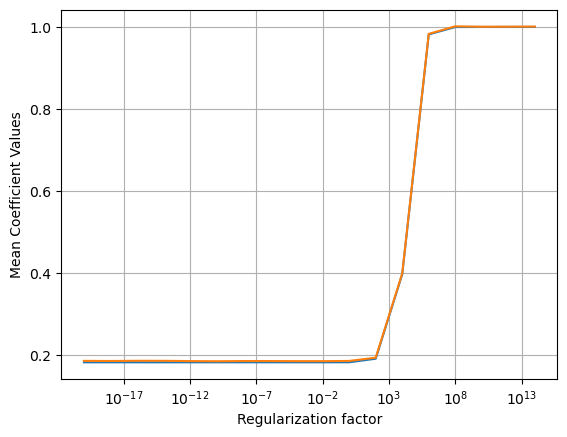

In [5]:
plt.semilogx(lambdas,Train) # Don't plot the bias term\
plt.semilogx(lambdas,Test) # Don't plot the bias term
plt.xlabel('Regularization factor')
plt.ylabel('Mean Coefficient Values')
plt.grid()

In [23]:
from automation import Tester

In [24]:
def linear_regression(X_train, X_test, Y_train, Y_text, variable):
    
    # Whatever you want
    MSE = 55
    return MSE




In [26]:
path = '/Users/william/Documents/University/civil engineering year 4/Semester 1 DTU/Introduction to machine learning/DTU_MachineLearning/Project2/StandardizedDataFrameWithNansFilled.csv'
tester = Tester('LifeExpectancyRegression', path_to_data=path, function_to_test=linear_regression, final_test=False, k = 10, variable = lamb)
tester.error

Training and testing...: 100%|██████████| 10/10 [00:00<00:00, 570.81it/s]


Generalization (MSError) error is: 55.0


AttributeError: 'Tester' object has no attribute 'error'

In [ ]:
|